# Shapely `Polygons`

## Imports

In [1]:
from shapely import Polygon

## Simple Polygon

In [2]:
coords = [
    [0, 0], [10, 0], [10, 6], [0, 6]
]

pol = Polygon(coords)

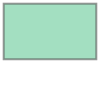

In [3]:
pol

### Check if polygon is valid

In [4]:
pol.is_valid

True

### Polygon's length

In [5]:
pol.length

32.0

### Polygon's area

In [6]:
pol.area

60.0

## Invalid Polygon with crossing lines

In [7]:
coords = [
    [0, 0], [10, 6], [10, 0], [0, 6]
]

pol = Polygon(coords)

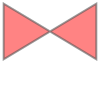

In [8]:
pol

In [9]:
pol.is_valid

False

In [10]:
pol.length  # In this case it calculated correctly

35.3238075793812

In [11]:
pol.area  # wrong

0.0

## Polygon with a hole

In [12]:
coords = [
    [0, 0], [10, 0], [10, 6], [0, 6]
]
hole = [
    [1, 1], [3, 1], [3, 4], [1, 4]
]

pol = Polygon(
    shell=coords,
    holes=[hole]
)

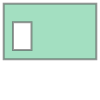

In [13]:
pol

### Polygon's length

* Length has increased as now we're counting the exterior and the interior

In [14]:
pol.length

42.0

### Polygon's area

* Area has decreased as we've got a hole :)

In [15]:
pol.area

54.0

## Polygon with a hole touching boundary

* one touch point is OK

In [16]:
coords = [
    [0, 0], [10, 0], [10, 6], [0, 6]
]
hole = [
    [0, 1], [3, 1], [3, 4], [1, 4]
]

pol = Polygon(
    shell=coords,
    holes=[hole]
)

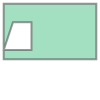

In [17]:
pol

In [18]:
pol.is_valid

True

## Polygon with with a hole touching boundary in two places

In [19]:
coords = [
    [0, 0], [10, 0], [10, 6], [0, 6]
]
hole = [
    [0, 1], [3, 0], [3, 4], [1, 4]
]

pol = Polygon(
    shell=coords,
    holes=[hole]
)

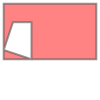

In [20]:
pol

In [21]:
pol.is_valid

False

## Polygon with multiple holes

In [22]:
coords = [
    [0, 0], [10, 0], [10, 6], [0, 6]
]
hole = [
    [1, 1], [3, 1], [3, 4], [1, 4]
]
hole2 = [
    [5, 2], [9, 2], [9, 5], [5, 5]
]

pol = Polygon(
    shell=coords,
    holes=[hole, hole2]
)

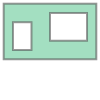

In [23]:
pol

## Polygon with holes touching each other

* One touch point is OK

In [24]:
coords = [
    [0, 0], [10, 0], [10, 6], [0, 6]
]
hole = [
    [1, 1], [3, 1], [4, 4], [1, 4]
]
hole2 = [
    [4, 4], [9, 2], [9, 5], [5, 5]
]

pol = Polygon(
    shell=coords,
    holes=[hole, hole2]
)

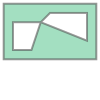

In [25]:
pol

In [26]:
pol.is_valid

True

### More than one touch point is invalid

In [27]:
coords = [
    [0, 0], [10, 0], [10, 6], [0, 6]
]
hole = [
    [1, 1], [3, 1], [3, 4], [1, 4]
]
hole2 = [
    [3, 1], [9, 2], [9, 5], [3, 4], [5, 3]
]

pol = Polygon(
    shell=coords,
    holes=[hole, hole2]
)

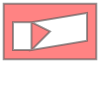

In [28]:
pol

### More examples

In [29]:
coords = [
    [0, 0], [10, 0], [10, 6], [0, 6]
]
hole = [
    [1, 1], [3, 1], [4, 4], [1, 4]
]
hole2 = [
    [4, 4], [9, 2], [9, 5], [5, 5]
]
hole3 = [
    [3, 1], [9, 2], [9, 1]
]


pol = Polygon(
    shell=coords,
    holes=[hole, hole2, hole3]
)

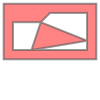

In [30]:
pol

## Polygon with holes touching each other and touching border

In [31]:
coords = [
    [0, 0], [10, 0], [10, 6], [0, 6]
]
hole = [
    [1, 1], [3, 1], [4, 4], [0, 4]
]
hole2 = [
    [5, 2], [9, 2], [9, 6], [5, 5]
]

pol = Polygon(
    shell=coords,
    holes=[hole, hole2]
)

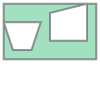

In [32]:
pol

## More examples

In [33]:
coords = [
    [0, 0], [10, 0], [10, 6], [0, 6]
]
hole = [
    [1, 1], [3, 1], [4, 4], [0, 4]
]
hole2 = [
    [4, 4], [9, 2], [9, 6], [5, 5]
]

pol = Polygon(
    shell=coords,
    holes=[hole, hole2]
)

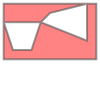

In [34]:
pol

## Area and length of holes and outer shape

In [35]:
coords = [
    [0, 0], [10, 0], [10, 6], [0, 6]
]
hole = [
    [1, 1], [3, 1], [3, 4], [1, 4]
]
hole2 = [
    [5, 2], [9, 2], [9, 5], [5, 5]
]

pol = Polygon(
    shell=coords,
    holes=[hole, hole2]
)

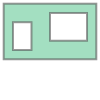

In [36]:
pol

### Getting area and lenght of the outer shape only

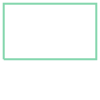

In [37]:
pol.exterior

In [38]:
type(pol.exterior)

shapely.geometry.polygon.LinearRing

In [39]:
pol.exterior.area

0.0

In [40]:
Polygon(pol.exterior).area

60.0

### Getting indivdiual areas and lenghts of each hole

In [41]:
pol.interiors[:]

[<LINEARRING (1 1, 3 1, 3 4, 1 4, 1 1)>,
 <LINEARRING (5 2, 9 2, 9 5, 5 5, 5 2)>]

In [42]:
for hole in pol.interiors[:]:
    print(hole)
    print(f"Area: {Polygon(hole).area}")
    print(f"Length: {hole.length}")
    print("\n")

LINEARRING (1 1, 3 1, 3 4, 1 4, 1 1)
Area: 6.0
Length: 10.0


LINEARRING (5 2, 9 2, 9 5, 5 5, 5 2)
Area: 12.0
Length: 14.0


